In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
# Set seed for results reproducibility 
seed = 42

In [3]:
df = pd.read_csv(r"C:\Users\Gonzalo\Desktop\df_2018.csv", index_col=0)
# Drop the null rows
df = df.set_index("codigo_x").dropna()
df.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7505,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.63,1008.23,468,82,0003A,sigue,11.188,24.283333,0,1
6600,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,22.60,1007.26,1187,80,1,sigue,8.079,27.766667,46,1
7515,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.53,1008.33,202,72,1,fue,8.400,21.900000,0,0
5933,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.45,1008.41,1582,51,1,sigue,3.738,10.183333,21,1
7170,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,50.12,1441.48,774,57,1,sigue,8.113,20.516667,0,1


In [4]:
df2 = pd.read_csv(r"C:\Users\Gonzalo\Desktop\df_2019.csv", index_col=0)
# Drop the null rows
df2 = df2.set_index("codigo_x").dropna()
df2.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7840,7,5,1143.52,462.91,60,60,257.02,367.56,673.86,0.0,...,340.18,3011.41,39,87,185,fue,4.940,6.433333,0,0
7505,7,5,721.00,173.04,60,60,143.04,0.00,0.00,0.0,...,86.05,1777.03,520,82,0003A,fue,11.188,24.283333,0,0
6600,7,5,721.00,30.38,60,50,120.22,180.25,0.00,0.0,...,21.07,1173.91,1503,80,0002A,sigue,8.079,27.766667,46,1
7685,7,5,721.00,30.38,60,60,120.22,0.00,0.00,0.0,...,28.04,1028.65,522,5,0002A,sigue,9.926,22.383333,0,1
7331,7,5,721.00,30.38,60,60,120.22,103.00,0.00,0.0,...,24.71,1104.85,338,45,1,fue,8.901,17.116667,59,0


In [5]:
frames = [df, df2]

df_all = pd.concat(frames)
df_all.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7505,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.63,1008.23,468,82,0003A,sigue,11.188,24.283333,0,1
6600,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,22.60,1007.26,1187,80,1,sigue,8.079,27.766667,46,1
7515,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.53,1008.33,202,72,1,fue,8.400,21.900000,0,0
5933,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.45,1008.41,1582,51,1,sigue,3.738,10.183333,21,1
7170,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,50.12,1441.48,774,57,1,sigue,8.113,20.516667,0,1


# Read the CSV and Perform Basic Data Cleaning

In [6]:
df_all.dropna(how='all', axis=1)
df_all.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7505,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.63,1008.23,468,82,0003A,sigue,11.188,24.283333,0,1
6600,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,22.60,1007.26,1187,80,1,sigue,8.079,27.766667,46,1
7515,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.53,1008.33,202,72,1,fue,8.400,21.900000,0,0
5933,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.45,1008.41,1582,51,1,sigue,3.738,10.183333,21,1
7170,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,50.12,1441.48,774,57,1,sigue,8.113,20.516667,0,1


In [7]:
df_all['dias_ratio']=df_all['dias_lab']/df_all['dias_pag']
df_all['dias_ratio'].fillna(0)

codigo_x
7505    0.714286
6600    0.714286
7515    0.714286
5933    0.714286
7170    0.714286
3890    0.714286
7526    0.714286
3652    0.714286
2530    0.714286
1123    0.714286
7458    0.714286
6104    0.714286
7005    0.714286
7259    0.714286
7276    0.714286
7312    0.714286
7338    0.714286
5677    0.714286
7531    0.714286
6210    0.714286
849     0.714286
7536    0.714286
5993    0.000000
7538    0.571429
7430    0.714286
5181    0.714286
7463    0.714286
7057    0.714286
7076    0.571429
5558    0.714286
          ...   
7989    0.571429
6203    0.857143
7226    0.857143
7885    0.857143
3326    0.857143
449     0.857143
6934    0.857143
7137    0.857143
6682    0.714286
1269    0.857143
7890    0.857143
8031    0.857143
1419    0.857143
8067    0.857143
8169    0.666667
3525    0.857143
8036    0.571429
6885    0.857143
7907    0.857143
8146    0.857143
4775    0.857143
8069    0.857143
4832    0.857143
3321    0.857143
624     0.857143
4385    0.857143
8135    0.857143
366  

In [8]:
#list(df_all)

# Select your features (columns)

In [9]:
df_all[["otras","fonac","alim","infon","falt","enf","ISPT","IMSS","t_ded"]]*=-1
df_all["t_ded"]

codigo_x
7505    -21.63
6600    -22.60
7515    -21.53
5933    -21.45
7170    -50.12
3890   -220.86
7526    -25.36
3652   -786.26
2530   -179.49
1123    -42.55
7458    -48.90
6104    -72.47
7005    -48.45
7259    -70.08
7276    -48.11
7312    -94.84
7338    -48.47
5677    -29.76
7531    -39.80
6210   -237.17
849    -160.10
7536    -20.83
5993     -0.00
7538   -122.66
7430   -181.84
5181    -22.11
7463    -21.83
7057   -191.23
7076   -186.99
5558    -67.58
         ...  
7989   -307.15
6203    -75.73
7226    -27.31
7885    -26.35
3326   -475.98
449    -516.33
6934   -429.06
7137   -160.87
6682   -163.42
1269    -28.21
7890    -83.78
8031    -23.72
1419   -519.95
8067    -77.08
8169     -8.99
3525    -35.99
8036   -258.64
6885    -26.15
7907   -333.18
8146    -19.65
4775    -41.93
8069   -202.92
4832    -34.04
3321   -262.23
624    -213.59
4385    -71.80
8135   -292.98
366    -433.05
6206   -167.26
7618    -31.11
Name: t_ded, Length: 18365, dtype: float64

In [10]:
# Set features. This will also be used as your x values.
df_selected = df_all[['dias_lab','sueldo','comp','asist','transp','vales_x','te_dob','te_trip','desc_Lab','fest_lab','dominic',
 'perc_grav','obj','util','otras','infon', 'falt', 'enf', 'ISPT', 'IMSS','subs','t_per_g','t_per_e','t_per','t_ded','neto',
 'antig','depto', 'tiempov', 'dist','delitos']]
df_selected

,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,fest_lab,...,t_per_g,t_per_e,t_per,t_ded,neto,antig,depto,tiempov,dist,delitos
codigo_x,,,,,,,,,,,,,,,,,,,,,
7505,5,618.52,132.86,60,60,120.22,0.00,0.00,0.00,0.00,...,871.38,158.48,1029.86,-21.63,1008.23,468,82,11.188,24.283333,0
6600,5,618.52,132.86,60,60,120.22,0.00,0.00,0.00,0.00,...,871.38,158.48,1029.86,-22.60,1007.26,1187,80,8.079,27.766667,46
7515,5,618.52,132.86,60,60,120.22,0.00,0.00,0.00,0.00,...,871.38,158.48,1029.86,-21.53,1008.33,202,72,8.400,21.900000,0
5933,5,618.52,132.86,60,60,120.22,0.00,0.00,0.00,0.00,...,871.38,158.48,1029.86,-21.45,1008.41,1582,51,3.738,10.183333,21
7170,5,618.52,132.86,60,60,120.22,0.00,0.00,0.00,0.00,...,1371.38,120.22,1491.60,-50.12,1441.48,774,57,8.113,20.516667,0
3890,5,1258.95,658.84,60,50,306.84,0.00,0.00,0.00,0.00,...,2027.79,306.84,2334.63,-220.86,2113.77,3143,6,43.738,69.100000,0
7526,5,618.52,132.86,60,60,120.22,132.54,265.08,0.00,0.00,...,1202.73,187.05,1389.78,-25.36,1364.42,144,68,4.177,13.183333,46
3652,5,1077.37,668.71,60,60,279.37,0.00,0.00,0.00,0.00,...,1866.08,279.37,2145.45,-786.26,1359.19,840,51,15.372,26.066667,0
2530,5,618.52,132.86,60,50,120.22,0.00,0.00,0.00,0.00,...,861.38,159.12,1020.50,-179.49,841.01,432,37,2.680,9.300000,74


In [11]:
#df_3["Puesto"] = df_3["Puesto"].apply(lambda row: label(row))
X = df_selected
X.dtypes

dias_lab       int64
sueldo       float64
comp         float64
asist          int64
transp         int64
vales_x      float64
te_dob       float64
te_trip      float64
desc_Lab     float64
fest_lab     float64
dominic      float64
perc_grav    float64
obj            int64
util           int64
otras        float64
infon        float64
falt         float64
enf          float64
ISPT         float64
IMSS         float64
subs         float64
t_per_g      float64
t_per_e      float64
t_per        float64
t_ded        float64
neto         float64
antig          int64
depto          int64
tiempov      float64
dist         float64
delitos        int64
dtype: object

In [12]:
y = df_all["label2"]
y.dtypes

dtype('int64')

C:\Users\Gonzalo\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [13] are constant.
  UserWarning)
C:\Users\Gonzalo\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


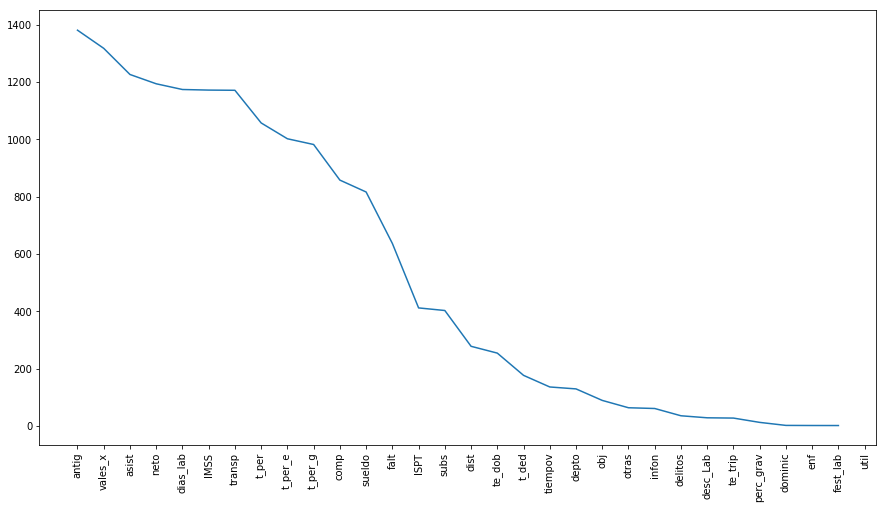

In [13]:
# Apply Univariate Feature Selection 
skb = SelectKBest(f_classif, k='all')
fit = skb.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
feat_scores = pd.concat([df_columns,df_scores],axis=1)
feat_scores.columns = ['Feature','Score'] 
feat_scores = feat_scores.sort_values(by=['Score'], ascending=False)

# Plot features to compare significative scores
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(feat_scores.Feature, feat_scores.Score)
plt.xticks(rotation=90)
plt.show()

# Create a Train Test Split

Use `status_bin` for the y values

In [14]:
# Select 11 features with highest score
sel_columns = feat_scores.iloc[0:19, 0].values

# Slice dataframe based on the selected features
X_featSel = X[sel_columns]

In [15]:
# Use train_test_split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_featSel, y, random_state=seed)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale your data

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\Gonzalo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [17]:
len(X_train_scaled[0])

19

In [18]:
len(X_test_scaled[0])

19

In [19]:
# Step 1: Label-encode data set
#label_encoder = LabelEncoder()
#label_encoder.fit(y_train)
#encoded_y_train = label_encoder.transform(y_train)
#encoded_y_test = label_encoder.transform(y_test)

In [20]:
# Step 2: Convert encoded labels to one-hot-encoding
# ohe = 
#y_train_categorical = to_categorical(encoded_y_train)
#y_test_categorical = to_categorical(encoded_y_test)

#y_train_categorical = y_train_categorical[0]

# Train the Model



In [21]:
#dtrain = xgb.DMatrix(X_train, label=y_train)
#dtest = xgb.DMatrix(X_test, label=y_test)

In [22]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_train_scaled, y_train)]
model.fit(X_train_scaled, y_train,eval_metric="error", eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.213679
[1]	validation_0-error:0.213679
[2]	validation_0-error:0.212735
[3]	validation_0-error:0.216656
[4]	validation_0-error:0.216656
[5]	validation_0-error:0.215276
[6]	validation_0-error:0.216656
[7]	validation_0-error:0.216801
[8]	validation_0-error:0.215639
[9]	validation_0-error:0.215494
[10]	validation_0-error:0.21426
[11]	validation_0-error:0.213679
[12]	validation_0-error:0.213389
[13]	validation_0-error:0.21288
[14]	validation_0-error:0.212953
[15]	validation_0-error:0.211428
[16]	validation_0-error:0.211646
[17]	validation_0-error:0.20925
[18]	validation_0-error:0.208379
[19]	validation_0-error:0.205111
[20]	validation_0-error:0.205184
[21]	validation_0-error:0.205838
[22]	validation_0-error:0.205838
[23]	validation_0-error:0.205838
[24]	validation_0-error:0.207072
[25]	validation_0-error:0.203659
[26]	validation_0-error:0.20228
[27]	validation_0-error:0.200755
[28]	validation_0-error:0.200247
[29]	validation_0-error:0.196254
[30]	validation_0-error:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [23]:
# make predictions for test data
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [24]:
predictions = [round(value) for value in y_pred]

In [25]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.89%


In [26]:
features_used=list(X_featSel)
print(features_used,model.feature_importances_)

['antig', 'vales_x', 'asist', 'neto', 'dias_lab', 'IMSS', 'transp', 't_per', 't_per_e', 't_per_g', 'comp', 'sueldo', 'falt', 'ISPT', 'subs', 'dist', 'te_dob', 't_ded', 'tiempov'] [0.20529146 0.09386977 0.00044337 0.11670411 0.         0.04673912
 0.00733911 0.         0.02911384 0.06704357 0.04953906 0.07230089
 0.05624937 0.02695442 0.00356058 0.0705547  0.01724304 0.06193101
 0.07512251]


In [27]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
antig,0.205291
neto,0.116704
vales_x,0.093870
tiempov,0.075123
sueldo,0.072301
dist,0.070555
t_per_g,0.067044
t_ded,0.061931
falt,0.056249
comp,0.049539


In [28]:

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.223177 using {'learning_rate': 0.3}
-0.689352 (0.000109) with: {'learning_rate': 0.0001}
-0.658311 (0.001059) with: {'learning_rate': 0.001}
-0.510395 (0.007203) with: {'learning_rate': 0.01}
-0.361595 (0.014608) with: {'learning_rate': 0.1}
-0.282903 (0.013259) with: {'learning_rate': 0.2}
-0.223177 (0.011308) with: {'learning_rate': 0.3}


In [29]:
model.fit(X_test_scaled, y_test,eval_metric="error", verbose=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [30]:
#Then fitting with monotonicity constraints only requires adding a single parameter
params ={'base_score':0.5, 
         'booster':'gbtree', 
         'colsample_bylevel':1,
         'colsample_bynode':1, 
         'colsample_bytree':1, 
         'gamma':0, 
         'learning_rate':0.3,
         'max_delta_step':0,
         'max_depth':7, 
         'min_child_weight':1, 
         'missing':None,
         'n_estimators':100,
         'n_jobs':1, 
         'objective':'binary:logistic', 'random_state':0, 'reg_alpha':0,
         'reg_lambda':1, 'scale_pos_weight':1, 'seed':seed, 
         'subsample':1, 'verbosity':1}
params_constrained = params.copy()
#params_constrained

In [31]:
params_constrained['tree_method'] = 'gpu_hist'
#params_constrained

In [32]:
params_constrained['interaction_constraints'] = '[1,2,3,6,7,8,9,10,11,14,16], [5,12,13,17]'
#params_constrained

In [33]:
data_train = xgb.DMatrix(X_train, label=y_train)
data_test = xgb.DMatrix(X_test, label=y_test)

C:\Users\Gonzalo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [34]:
model_with_constraints = xgb.train(params_constrained, data_train)
model_with_constraints

In [35]:
#y_predicted = gbdt.predict(dtest_split)
# make predictions for test data
y_pred_constraints = model_with_constraints.predict(data_train)
y_pred_constraints

array([0.935704  , 0.06244241, 0.9475839 , ..., 0.9707201 , 0.04073018,
       0.77969766], dtype=float32)

In [36]:
predictions = [round(value) for value in y_pred_constraints]
predictions.count

<function list.count(value, /)>

In [37]:
# evaluate predictions
accuracy = accuracy_score(y_train,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.97%


In [39]:
feature_importances = pd.DataFrame(model_with_constraints.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

AttributeError: 'Booster' object has no attribute 'feature_importances_'